In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# One-sample T-Test

In [2]:
# Not that common since you wont really know about the population mean in the real world
# But you can assume a value for your population mean

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

def simulate_one_sample_ttest(sample_size=30, population_mean=0, sample_mean=2, std_dev=3, n_simulations=1000):
    """
    Simulates one-sample t-tests multiple times and analyzes the results.
    
    Parameters:
    - sample_size: Size of each sample
    - population_mean: The null hypothesis value (H0)
    - sample_mean: The true mean of the distribution we're sampling from
    - std_dev: Standard deviation of the distribution
    - n_simulations: Number of simulations to run
    
    Returns:
    - DataFrame with simulation results
    """
    # Lists to store results
    p_values = []
    t_stats = []
    reject_null = []
    
    # Run multiple simulations
    for _ in range(n_simulations):
        # Generate a random sample from a normal distribution
        sample = np.random.normal(loc=sample_mean, scale=std_dev, size=sample_size)
        
        # Perform one-sample t-test against the null hypothesis value
        t_stat, p_value = stats.ttest_1samp(sample, population_mean)
        
        # Store results
        t_stats.append(t_stat)
        p_values.append(p_value)
        reject_null.append(p_value < 0.05)  # Using alpha = 0.05
    
    # Create a DataFrame with results
    results = pd.DataFrame({
        'T-Statistic': t_stats,
        'P-Value': p_values,
        'Reject Null': reject_null
    })
    
    # Calculate the percentage of times we rejected the null hypothesis (statistical power)
    power = results['Reject Null'].mean() * 100

    # Display summary statistics
    print(f"Number of simulations: {len(results)}")
    print(f"Percentage of tests that rejected the null hypothesis: {power:.2f}%")
    print("\nSummary of t-statistics:")
    print(results['T-Statistic'].describe())
    print("\nSummary of p-values:")
    print(results['P-Value'].describe())

    # Create visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram of t-statistics
    ax1.hist(results['T-Statistic'], bins=30, edgecolor='black', alpha=0.7)
    ax1.axvline(x=0, color='red', linestyle='--', label=f'H0: μ = {sample_mean}')
    ax1.set_title('Distribution of t-Statistics')
    ax1.set_xlabel('t-Statistic')
    ax1.set_ylabel('Frequency')
    ax1.legend()

    # Histogram of p-values
    ax2.hist(results['P-Value'], bins=30, edgecolor='black', alpha=0.7)
    ax2.axvline(x=0.05, color='red', linestyle='--', label='α = 0.05')
    ax2.set_title('Distribution of p-Values')
    ax2.set_xlabel('p-Value')
    ax2.set_ylabel('Frequency')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # Example of a single test for demonstration
    print("\nExample of a single one-sample t-test:")
    example_sample = np.random.normal(loc=sample_mean, scale=std_dev, size=sample_size)
    t_stat, p_value = stats.ttest_1samp(example_sample, 0)
    print(f"Sample mean: {example_sample.mean():.4f}")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Reject null hypothesis: {p_value < 0.05}")
    
    return results

## Reject Null Hypothesis case

Number of simulations: 300
Percentage of tests that rejected the null hypothesis: 100.00%

Summary of t-statistics:
count    300.000000
mean      36.771526
std        5.211116
min       25.666291
25%       33.238200
50%       36.002397
75%       39.745049
max       61.744491
Name: T-Statistic, dtype: float64

Summary of p-values:
count    3.000000e+02
mean     1.903953e-23
std      1.244292e-22
min      2.501721e-32
25%      7.615578e-27
50%      1.268940e-25
75%      1.220036e-24
max      1.728572e-21
Name: P-Value, dtype: float64


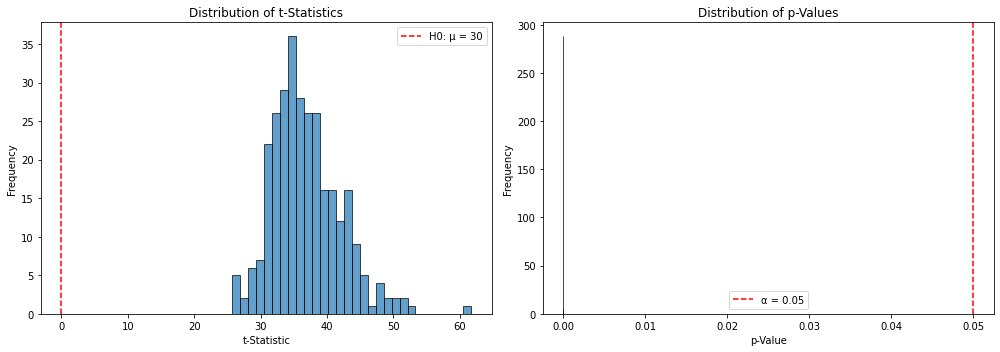


Example of a single one-sample t-test:
Sample mean: 30.1854
t-statistic: 70.0752
p-value: 0.0000
Reject null hypothesis: True


In [7]:
# Population and sample means are significantly different, should reject H0
results = simulate_one_sample_ttest(population_mean = 10,
                                    sample_mean = 30,
                                    n_simulations = 300)

## Null Hypothesis was not rejected case

Number of simulations: 300
Percentage of tests that rejected the null hypothesis: 5.67%

Summary of t-statistics:
count    300.000000
mean       0.075789
std        1.032823
min       -3.217898
25%       -0.687734
50%        0.148417
75%        0.698638
max        3.534233
Name: T-Statistic, dtype: float64

Summary of p-values:
count    300.000000
mean       0.495562
std        0.280436
min        0.001393
25%        0.256156
50%        0.489510
75%        0.726046
max        0.993356
Name: P-Value, dtype: float64


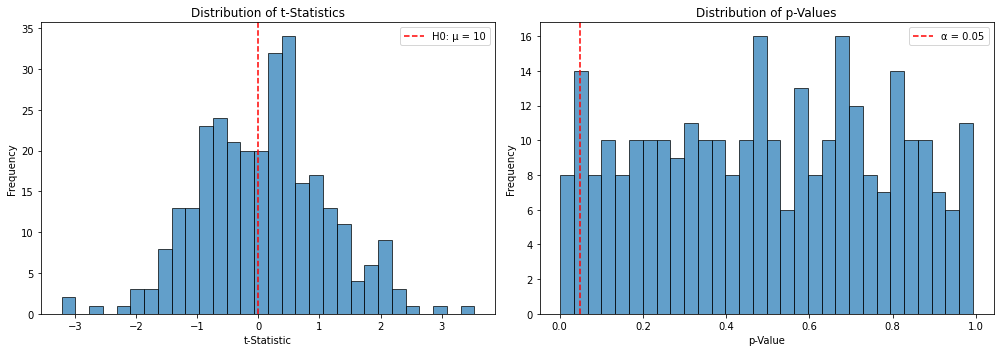


Example of a single one-sample t-test:
Sample mean: 9.6490
t-statistic: 16.9728
p-value: 0.0000
Reject null hypothesis: True


In [5]:
# Population & sample means are the same, lower power to reject H0
results = simulate_one_sample_ttest(population_mean = 10,
                                    sample_mean = 10,
                                    n_simulations = 300)

# One Sample Z-test

In [ ]:
# Not common since you wont know the variance in the real world

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

def simulate_one_sample_ztest(sample_size=30,
                              population_mean=0,
                              population_std_dev = 1,
                              sample_mean=2,
                              std_dev=3,
                              n_simulations=1000):
    """
    Simulates one-sample z-tests multiple times and analyzes the results.
    
    Parameters:
    - sample_size: Size of each sample
    - population_mean: The null hypothesis value (H0)
    - population_std_dev: The null hypothesis value (H0)
    - sample_mean: The true mean of the distribution we're sampling from
    - std_dev: Standard deviation of the distribution
    - n_simulations: Number of simulations to run
    
    Returns:
    - DataFrame with simulation results
    """
    p_values = []
    z_stats = []
    reject_null = []
    
    # Run multiple simulations
    for _ in range(n_simulations):
        # Generate a random sample from a normal distribution based on the sample mean and vairance
        sample = np.random.normal(loc = sample_mean,
                                  scale = std_dev,
                                  size = sample_size)
        x_bar = np.mean(sample)
        # (x_bar - μ) / (σ / √n)
        z_stat = (x_bar - population_mean) / (population_std_dev / np.sqrt(sample_size))
        p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
        
        z_stats.append(z_stat)
        p_values.append(p_value)
        reject_null.append(p_value < 0.05)
    
    # Create a DataFrame with results
    results = pd.DataFrame({
        'Z-Statistic': z_stats,
        'P-Value': p_values,
        'Reject Null': reject_null
    })
    
    # Calculate the percentage of times we rejected the null hypothesis (statistical power)
    power = results['Reject Null'].mean() * 100
    
    # Display summary statistics
    print(f"Number of simulations: {len(results)}")
    print(f"Percentage of tests that rejected the null hypothesis: {power:.2f}%")
    print("\nSummary of z-statistics:")
    print(results['Z-Statistic'].describe())
    print("\nSummary of p-values:")
    print(results['P-Value'].describe())

    # Create visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram of t-statistics
    ax1.hist(results['Z-Statistic'], bins=30, edgecolor='black', alpha=0.7)
    ax1.axvline(x=0, color='red', linestyle='--', label=f'H0: μ = {sample_mean}')
    ax1.set_title('Distribution of z-Statistics')
    ax1.set_xlabel('z-Statistic')
    ax1.set_ylabel('Frequency')
    ax1.legend()

    # Histogram of p-values
    ax2.hist(results['P-Value'], bins=30, edgecolor='black', alpha=0.7)
    ax2.axvline(x=0.05, color='red', linestyle='--', label='α = 0.05')
    ax2.set_title('Distribution of p-Values')
    ax2.set_xlabel('p-Value')
    ax2.set_ylabel('Frequency')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # Example of a single test for demonstration
    print("\nExample of a single one-sample t-test:")
    example_sample = np.random.normal(loc=sample_mean, scale=std_dev, size=sample_size)
    x_bar = np.mean(example_sample)
    z_stat = (x_bar - population_mean) / (population_std_dev / np.sqrt(sample_size))
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    print(f"Sample mean: {example_sample.mean():.4f}")
    print(f"t-statistic: {z_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Reject null hypothesis: {p_value < 0.05}")
    return results

## Reject Null Hypothesis case

Number of simulations: 1000
Percentage of tests that rejected the null hypothesis: 100.00%

Summary of z-statistics:
count    1000.000000
mean     -361.498832
std         0.993505
min      -364.809962
25%      -362.200879
50%      -361.488369
75%      -360.858116
max      -357.427829
Name: Z-Statistic, dtype: float64

Summary of p-values:
count    1000.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: P-Value, dtype: float64


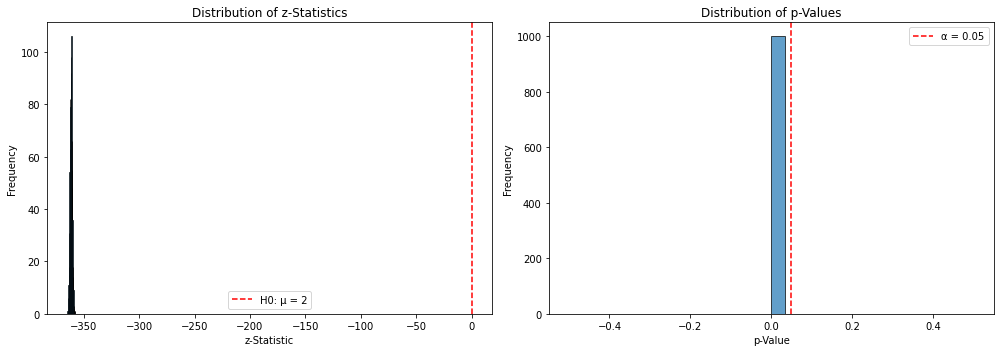


Example of a single one-sample t-test:
Sample mean: 0.9397
t-statistic: -363.4328
p-value: 0.0000
Reject null hypothesis: True


In [9]:
# Population and sample means are significantly different, should reject H0
results = simulate_one_sample_ztest(sample_size=30,
                          population_mean=200,
                          population_std_dev = 3,
                          sample_mean=2,
                          std_dev=3,
                          n_simulations=1000)

## Null Hypothesis was not rejected case

Number of simulations: 1000
Percentage of tests that rejected the null hypothesis: 4.60%

Summary of z-statistics:
count    1000.000000
mean        0.026494
std         0.979190
min        -3.129918
25%        -0.618578
50%         0.068226
75%         0.694546
max         3.007511
Name: Z-Statistic, dtype: float64

Summary of p-values:
count    1000.000000
mean        0.502835
std         0.284183
min         0.001749
25%         0.261752
50%         0.504856
75%         0.741963
max         0.999945
Name: P-Value, dtype: float64


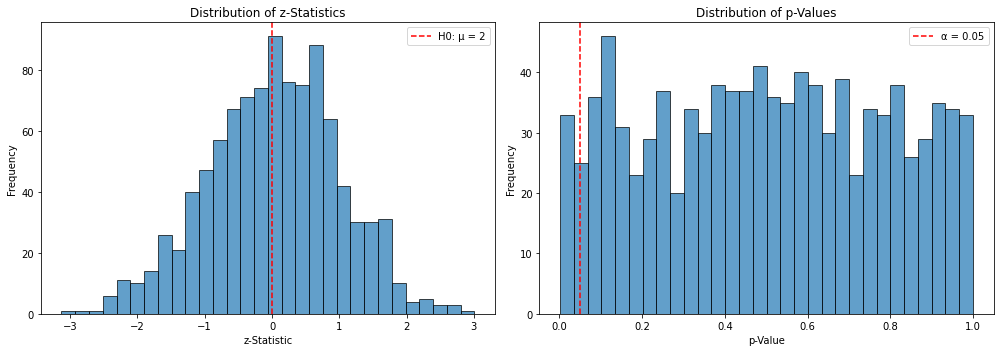


Example of a single one-sample t-test:
Sample mean: 1.7384
t-statistic: -0.4776
p-value: 0.6329
Reject null hypothesis: False


In [20]:
# Population & sample means & stds are the same, lower power to reject H0
results = simulate_one_sample_ztest(sample_size=30,
                          population_mean=2,
                          population_std_dev = 3,
                          sample_mean=2,
                          std_dev=3,
                          n_simulations=1000)

# Two Sample T-test with known population variance

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

def simulate_two_sample_ttest_with_known_variance(sample_one_size = 30,
                                                  sample_two_size = 30,
                                                 population_one_mean = 2,
                                                 population_one_std_dev = 1,
                                                 population_two_mean = 2,
                                                 population_two_std_dev = 1,
                                                 n_simulations = 300):
    """
    Simulates two-sample t-tests multiple times with known population mean and variance and analyzes the results.
    
    Parameters:
    - sample_one_size: Size of first sample
    - sample_two_size: Size of second sample
    - population_one_mean: Mean on the first population
    - population_one_std_dev: Standard Deviation for the first sample (Usually wont know about it)
    - population_two_mean: Mean on the second population
    - population_two_std_dev: Standard Deviation for the second sample (Usually wont know about it)
    - n_simulations: Number of simulations to run
    
    Returns:
    - DataFrame with simulation results
    """
    p_values = []
    t_stats = []
    reject_null = []
    mean_differences = []
    
    # Run multiple simulations
    for _ in range(n_simulations):
        # Generate a random sample from a normal distribution based on the sample mean and vairance from each sample
        sample_1 = np.random.normal(loc = population_one_mean,
                                  scale = population_one_std_dev,
                                  size = sample_one_size)
        sample_2 = np.random.normal(loc = population_two_mean,
                                  scale = population_two_std_dev,
                                  size = sample_two_size)
        mean_1 = np.mean(sample_1)
        mean_2 = np.mean(sample_2)
        
        # calculate the diff. among the sample mean & population mean
        sample_mean_diff = mean_1 - mean_2
        population_mean_diff = population_one_mean - population_two_mean
        
        # (x_bar1 - x_bar2) - (μ1 - μ2) / ((σ1^2 / √n1) + (σ2^2 / √n2))^0.5
        t_stat = sample_mean_diff / np.sqrt((population_one_std_dev**2 / sample_one_size) + (population_two_std_dev**2 / sample_two_size))
        p_value = 2 * (1 - stats.norm.cdf(abs(t_stat))) # two-tailed
        
        t_stats.append(t_stat)
        p_values.append(p_value)
        reject_null.append(p_value < 0.05)
        mean_differences.append(sample_mean_diff)
    
    # Create a DataFrame with results
    results = pd.DataFrame({
        'T-Statistic': t_stats,
        'P-Value': p_values,
        'Reject Null': reject_null,
        'Mean Difference' : mean_differences
    })
    
    # Calculate the percentage of times we rejected the null hypothesis (statistical power)
    power = results['Reject Null'].mean() * 100
    
    # Display summary statistics
    print(f"Number of simulations: {len(results)}")
    print(f"Percentage of tests that rejected the null hypothesis: {power:.2f}%")
    print("\nSummary of t-statistics:")
    print(results['T-Statistic'].describe())
    print("\nSummary of p-values:")
    print(results['P-Value'].describe())

    # Create visualizations
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))

    # Histogram of t-statistics
    ax1.hist(results['T-Statistic'], bins=30, edgecolor='black', alpha=0.7)
    ax1.axvline(x=0, color='red', linestyle='--', label=f'H0: μ1 = μ2')
    ax1.set_title('Distribution of t-Statistics')
    ax1.set_xlabel('t-Statistic')
    ax1.set_ylabel('Frequency')
    ax1.legend()

    # Histogram of p-values
    ax2.hist(results['P-Value'], bins=30, edgecolor='black', alpha=0.7)
    ax2.axvline(x=0.05, color='red', linestyle='--', label='α = 0.05')
    ax2.set_title('Distribution of p-Values')
    ax2.set_xlabel('p-Value')
    ax2.set_ylabel('Frequency')
    ax2.legend()
    
    # Histogram of mean differences
    ax3.hist(results['Mean Difference'], bins=30, edgecolor='black', alpha=0.7)
    ax3.axvline(x=population_mean_diff, color='red', linestyle='--', 
                label=f'Expected: μ1-μ2 = {population_mean_diff}')
    ax3.set_title('Distribution of Sample Mean Differences')
    ax3.set_xlabel('Mean Difference')
    ax3.set_ylabel('Frequency')
    ax3.legend()

    plt.tight_layout()
    plt.show()

    # Example of a single test for demonstration
    print("\nExample of a two-sample t-test:")
    # Generate a random sample from a normal distribution based on the sample mean and vairance from each sample
    example_sample_1 = np.random.normal(loc = population_one_mean,
                              scale = population_one_std_dev,
                              size = sample_one_size)
    example_sample_2 = np.random.normal(loc = population_two_mean,
                              scale = population_two_std_dev,
                              size = sample_two_size)
    mean_1 = np.mean(example_sample_1)
    mean_2 = np.mean(example_sample_2)

    # calculate the diff. among the sample mean & population mean
    sample_mean_diff = mean_1 - mean_2
    population_mean_diff = population_one_mean - population_two_mean

    # (x_bar1 - x_bar2) - (μ1 - μ2) / ((σ1^2 / √n1) + (σ2^2 / √n2))^0.5
    t_stat = sample_mean_diff / np.sqrt((population_one_std_dev**2 / sample_one_size) + (population_two_std_dev**2 / sample_two_size))
    p_value = 2 * (1 - stats.norm.cdf(abs(t_stat))) # two-tailed
    print(f"Sample 1 mean: {example_sample_1.mean():.4f}")
    print(f"Sample 2 mean: {example_sample_2.mean():.4f}")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Reject null hypothesis: {p_value < 0.05}")
    return results
        

## Reject Null Hypothesis case

Number of simulations: 300
Percentage of tests that rejected the null hypothesis: 100.00%

Summary of t-statistics:
count    300.000000
mean       6.501932
std        0.989508
min        3.244311
25%        5.848874
50%        6.507728
75%        7.175863
max        9.357904
Name: T-Statistic, dtype: float64

Summary of p-values:
count    3.000000e+02
mean     4.599986e-06
std      6.814649e-05
min      0.000000e+00
25%      7.188694e-13
50%      7.630374e-11
75%      4.953279e-09
max      1.177353e-03
Name: P-Value, dtype: float64


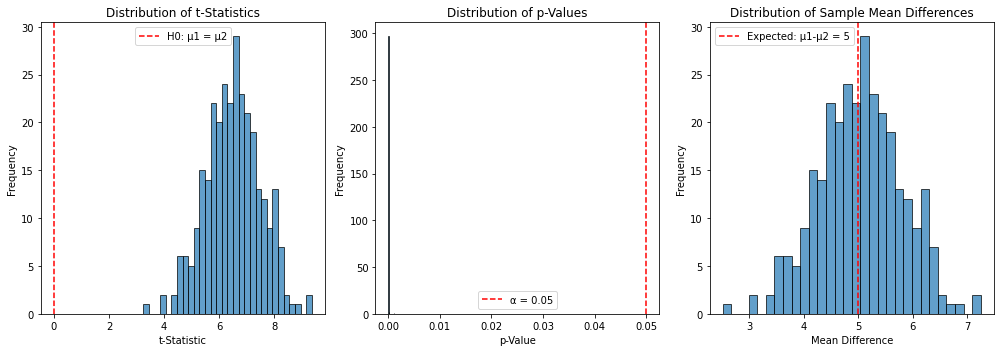


Example of a two-sample t-test:
Sample 1 mean: 9.9274
Sample 2 mean: 4.6490
t-statistic: 6.8144
p-value: 0.0000
Reject null hypothesis: True


In [12]:
# Population means are significantly different, should reject H0
results_reject = simulate_two_sample_ttest_with_known_variance(
    sample_one_size=30,
    sample_two_size=30,
    population_one_mean=10,  # Meaningful difference from population_two_mean
    population_one_std_dev=3,
    population_two_mean=5,
    population_two_std_dev=3,
    n_simulations=300
)

## Null Hypothesis was not rejected case

Number of simulations: 300
Percentage of tests that rejected the null hypothesis: 3.00%

Summary of t-statistics:
count    300.000000
mean       0.050121
std        0.955729
min       -2.562511
25%       -0.651501
50%        0.076158
75%        0.819749
max        2.341428
Name: T-Statistic, dtype: float64

Summary of p-values:
count    300.000000
mean       0.481506
std        0.265695
min        0.010392
25%        0.260453
50%        0.469384
75%        0.701243
max        0.992080
Name: P-Value, dtype: float64


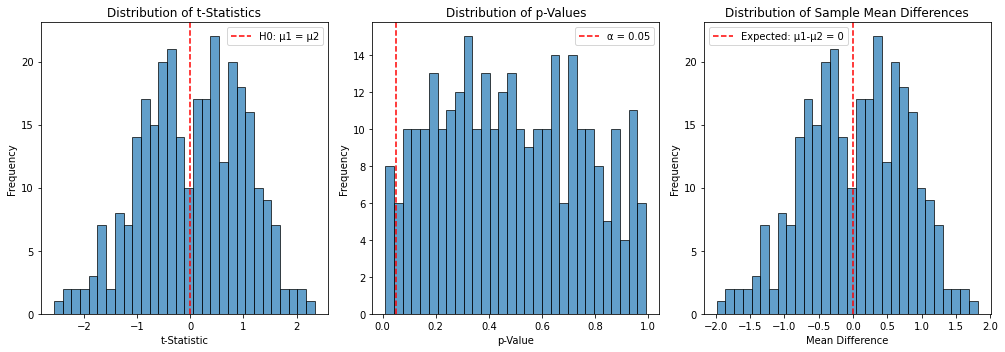


Example of a two-sample t-test:
Sample 1 mean: 7.3384
Sample 2 mean: 7.1854
t-statistic: 0.1975
p-value: 0.8434
Reject null hypothesis: False


In [13]:
# Population means are the same, lower power to reject H0
results_dont_reject = simulate_two_sample_ttest_with_known_variance(
    sample_one_size=30,
    sample_two_size=30,
    population_one_mean=7,  # Same as population_two_mean
    population_one_std_dev=3,
    population_two_mean=7,
    population_two_std_dev=3,
    n_simulations=300
)

# Two Sample T-test with unknown population variance

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

def simulate_two_sample_ttest_with_unknown_variance(sample_one_size = 30,
                                                  sample_two_size = 30,
                                                 population_one_mean = 2,
                                                 population_one_std_dev = 1,
                                                 population_two_mean = 2,
                                                 population_two_std_dev = 1,
                                                 n_simulations = 300):
    """
    Simulates two-sample t-tests multiple times with known population mean and variance and analyzes the results.
    
    Parameters:
    - sample_one_size: Size of first sample
    - sample_two_size: Size of second sample
    - population_one_mean: Mean on the first population
    - population_one_std_dev: Standard Deviation for the first sample (Usually wont know about it)
    - population_two_mean: Mean on the second population
    - population_two_std_dev: Standard Deviation for the second sample (Usually wont know about it)
    - n_simulations: Number of simulations to run
    
    Returns:
    - DataFrame with simulation results
    """
    p_values = []
    t_stats = []
    reject_null = []
    mean_differences = []
    
    # Run multiple simulations
    for _ in range(n_simulations):
        # Generate a random sample from a normal distribution based on the sample mean and vairance from each sample
        sample_1 = np.random.normal(loc = population_one_mean,
                                  scale = population_one_std_dev,
                                  size = sample_one_size)
        sample_2 = np.random.normal(loc = population_two_mean,
                                  scale = population_two_std_dev,
                                  size = sample_two_size)
        # calling the stats library for the t-stats & p value
        t_stat, p_value = stats.ttest_ind(sample_1, sample_2, equal_var = False)
        t_stats.append(t_stat)
        p_values.append(p_value)
        reject_null.append(p_value < 0.05)
    
    # Create a DataFrame with results
    results = pd.DataFrame({
        'T-Statistic': t_stats,
        'P-Value': p_values,
        'Reject Null': reject_null
    })
    
    # Calculate the percentage of times we rejected the null hypothesis (statistical power)
    power = results['Reject Null'].mean() * 100
    
    # Display summary statistics
    print(f"Number of simulations: {len(results)}")
    print(f"Percentage of tests that rejected the null hypothesis: {power:.2f}%")
    print("\nSummary of t-statistics:")
    print(results['T-Statistic'].describe())
    print("\nSummary of p-values:")
    print(results['P-Value'].describe())

    # Create visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram of t-statistics
    ax1.hist(results['T-Statistic'], bins=30, edgecolor='black', alpha=0.7)
    ax1.axvline(x=0, color='red', linestyle='--', label=f'H0: μ1 = μ2')
    ax1.set_title('Distribution of t-Statistics')
    ax1.set_xlabel('t-Statistic')
    ax1.set_ylabel('Frequency')
    ax1.legend()

    # Histogram of p-values
    ax2.hist(results['P-Value'], bins=30, edgecolor='black', alpha=0.7)
    ax2.axvline(x=0.05, color='red', linestyle='--', label='α = 0.05')
    ax2.set_title('Distribution of p-Values')
    ax2.set_xlabel('p-Value')
    ax2.set_ylabel('Frequency')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # Example of a single test for demonstration
    print("\nExample of a two-sample t-test:")
    # Generate a random sample from a normal distribution based on the sample mean and vairance from each sample
    example_sample_1 = np.random.normal(loc = population_one_mean,
                              scale = population_one_std_dev,
                              size = sample_one_size)
    example_sample_2 = np.random.normal(loc = population_two_mean,
                              scale = population_two_std_dev,
                              size = sample_two_size)
    t_stat, p_value = stats.ttest_ind(example_sample_1, example_sample_2, equal_var = False)
    print(f"Sample 1 mean: {example_sample_1.mean():.4f}")
    print(f"Sample 2 mean: {example_sample_2.mean():.4f}")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Reject null hypothesis: {p_value < 0.05}")
    return results
        

## Reject Null Hypothesis case

Number of simulations: 300
Percentage of tests that rejected the null hypothesis: 100.00%

Summary of t-statistics:
count    300.000000
mean     -12.994535
std        1.566969
min      -19.453989
25%      -13.811245
50%      -12.947461
75%      -11.895147
max       -9.458304
Name: T-Statistic, dtype: float64

Summary of p-values:
count    3.000000e+02
mean     3.376121e-15
std      4.324904e-14
min      1.119062e-26
25%      9.942471e-20
50%      1.901098e-18
75%      6.456973e-17
max      7.460597e-13
Name: P-Value, dtype: float64


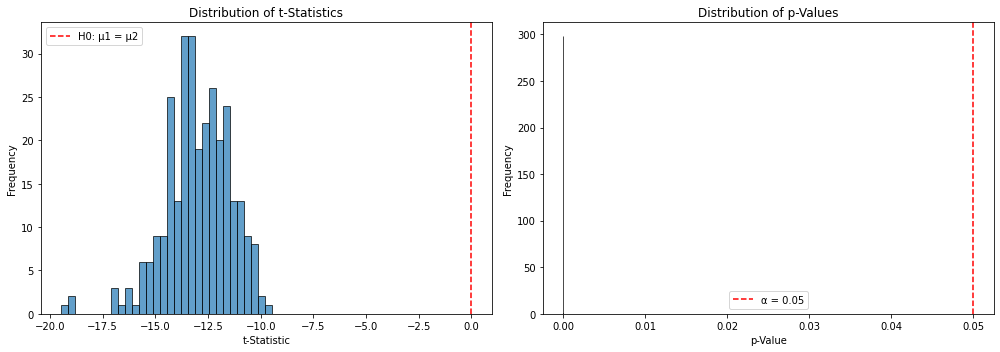


Example of a two-sample t-test:
Sample 1 mean: 10.3384
Sample 2 mean: 20.1854
t-statistic: -14.9990
p-value: 0.0000
Reject null hypothesis: True


In [16]:
# Population means are significantly different, should reject H0
results_reject = simulate_two_sample_ttest_with_unknown_variance(
    sample_one_size=30,
    sample_two_size=30,
    population_one_mean=10,  # Meaningful difference from population_two_mean
    population_one_std_dev=3,
    population_two_mean=20,
    population_two_std_dev=3,
    n_simulations=300
)

## Null Hypothesis was not rejected case

Number of simulations: 300
Percentage of tests that rejected the null hypothesis: 4.33%

Summary of t-statistics:
count    300.000000
mean       0.089986
std        1.055131
min       -3.217685
25%       -0.676300
50%        0.099311
75%        0.839017
max        2.994333
Name: T-Statistic, dtype: float64

Summary of p-values:
count    300.000000
mean       0.474404
std        0.284005
min        0.002136
25%        0.217411
50%        0.474015
75%        0.718335
max        0.998274
Name: P-Value, dtype: float64


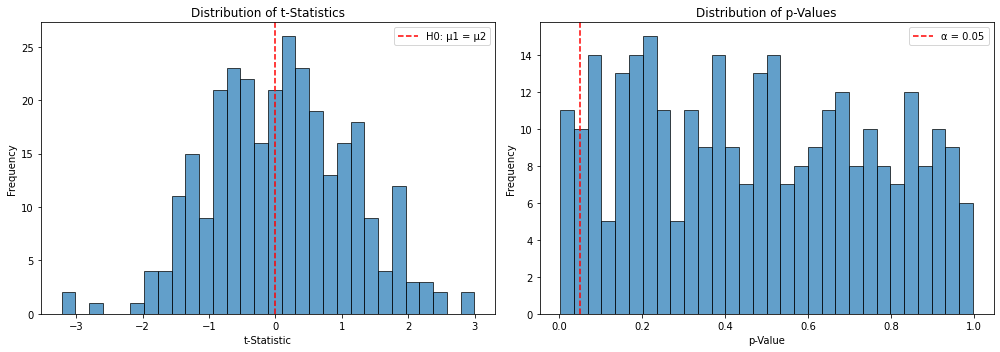


Example of a two-sample t-test:
Sample 1 mean: 10.6102
Sample 2 mean: 9.9806
t-statistic: 0.8438
p-value: 0.4028
Reject null hypothesis: False


In [17]:
# Population means are the same, lower power to reject H0
results_reject = simulate_two_sample_ttest_with_unknown_variance(
    sample_one_size=30,
    sample_two_size=30,
    population_one_mean=10,  # Meaningful difference from population_two_mean
    population_one_std_dev=3,
    population_two_mean=10,
    population_two_std_dev=3,
    n_simulations=300
)

# One Sample Proportion Test

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

def simulate_one_sample_proportion_test(sample_size=30, population_proportion = 0.8, sample_proportion = 0.7, n_simulations=10000):
    """
    Simulates one-sample t-tests multiple times and analyzes the results.
    
    Parameters:
    - sample_size: Size of sample
    - population_proportion: The null hypothesis value (H0)
    - sample_proportion: The sample proportion for data simulation
    - n_simulations: Number of simulations to run
    
    Returns:
    - DataFrame with simulation results
    """
    sample = np.random.binomial(1, sample_proportion, sample_size)
    